<a href="https://colab.research.google.com/github/yoonseongan/com_vision/blob/main/CV_HW2_2020016009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CV_HW2_2020016009

### 2-1

이미지가 이미 존재합니다: Fig0309(a)(washed_out_aerial_image).tif


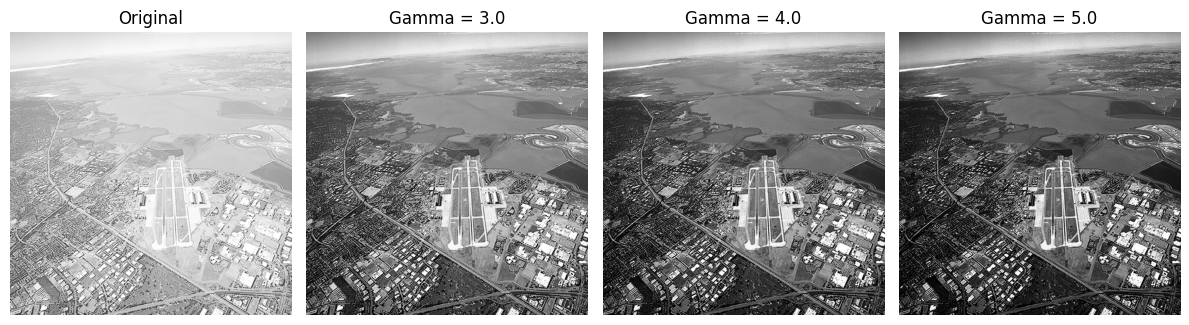

In [9]:
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. 실험 이미지 다운로드
url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif"
filename = "Fig0309(a)(washed_out_aerial_image).tif"

# 파일이 없을 경우만 다운로드
if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)
    print("이미지 다운로드 완료:", filename)
else:
    print("이미지가 이미 존재합니다:", filename)

# 2. 이미지 불러오기 (그레이스케일)
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# 3. 정규화 (0~1)
img_norm = img / 255.0

# 4. 감마 값 리스트
gammas = [3.0, 4.0, 5.0]
results = []

# 5. 감마 보정 적용
for gamma in gammas:
    transformed = np.power(img_norm, gamma)     # s = r^gamma
    transformed = np.uint8(transformed * 255)   # 다시 0~255 범위로 복원
    results.append(transformed)

# 6. 결과 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, len(gammas)+1, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

for i, gamma in enumerate(gammas):
    plt.subplot(1, len(gammas)+1, i+2)
    plt.imshow(results[i], cmap='gray')
    plt.title(f'Gamma = {gamma}')
    plt.axis('off')

plt.tight_layout()
plt.show()


감마 보정을 통해 명암 대비가 낮은 이미지를 점점 더 선명하게 개선함.
Gamma 값이 클수록 어두운 영역을 강조하여 전체 이미지 디테일이 뚜렷해짐.

### 2-2

이미지가 이미 존재합니다: Fig0310(b)(washed_out_pollen_image).tif


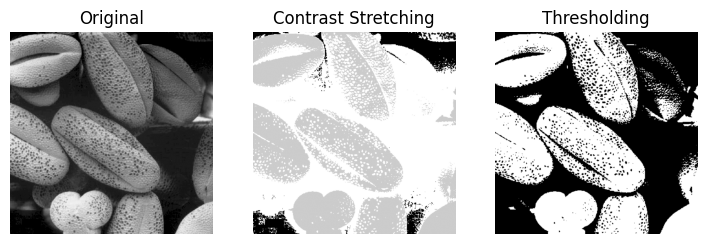

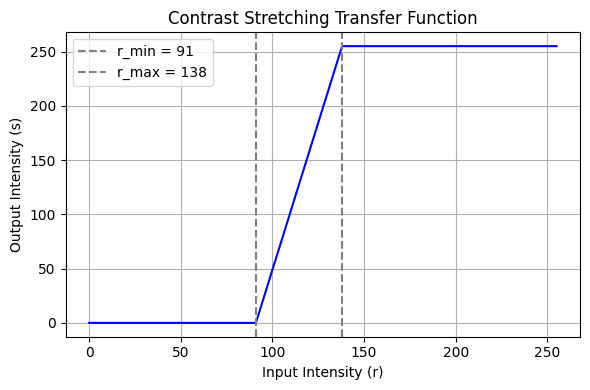

In [8]:
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# =====================================
# 1. 실험 이미지 다운로드
# =====================================
url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0310(b)(washed_out_pollen_image).tif"
filename = "Fig0310(b)(washed_out_pollen_image).tif"

# 파일이 없으면 다운로드
if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)
    print("이미지 다운로드 완료:", filename)
else:
    print("이미지가 이미 존재합니다:", filename)

# =====================================
# 2. 이미지 불러오기 (흑백)
# =====================================
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# =====================================
# 3. Contrast Stretching (대비 스트레칭)
# =====================================
# 입력 영상의 최솟값, 최댓값 계산
min_val = np.min(img)
max_val = np.max(img)

# 대비 스트레칭 수식 적용: s = (r - r_min) * 255 / (r_max - r_min)
contrast_stretched = ((img - min_val) * 255 / (max_val - min_val)).astype(np.uint8)

# =====================================
# 4. Thresholding (이진화 처리)
# =====================================
# 적절한 임계값 지정 (예: 평균값 사용 가능)
threshold_value = np.mean(img)
_, thresholded = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

# =====================================
# 5. 시각화
# =====================================
plt.figure(figsize=(12, 6))

# 원본 이미지
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

# 히스토그램 평탄화 대신 Contrast Stretching
plt.subplot(1, 4, 2)
plt.imshow(contrast_stretched, cmap='gray')
plt.title("Contrast Stretching")
plt.axis('off')

# Threshold 결과
plt.subplot(1, 4, 3)
plt.imshow(thresholded, cmap='gray')
plt.title("Thresholding")
plt.axis('off')


# 기존 이미지에서 구한 최소/최대 밝기값
r_min = np.min(img)
r_max = np.max(img)

# x축: 입력 픽셀값 r
r_vals = np.arange(0, 256)
# y축: 스트레칭된 픽셀값 s
s_vals = np.clip((r_vals - r_min) * 255 / (r_max - r_min), 0, 255)

# 선형 변환 함수 그래프 시각화
plt.figure(figsize=(6, 4))
plt.plot(r_vals, s_vals, color='blue')
plt.title("Contrast Stretching Transfer Function")
plt.xlabel("Input Intensity (r)")
plt.ylabel("Output Intensity (s)")
plt.grid(True)
plt.axvline(x=r_min, color='gray', linestyle='--', label=f"r_min = {r_min}")
plt.axvline(x=r_max, color='gray', linestyle='--', label=f"r_max = {r_max}")
plt.legend()
plt.tight_layout()
plt.show()


대비 스트레칭으로 전체 밝기 범위를 활용해 이미지 선명도 개선.
평균 밝기 기준 임계값 이진화로 객체 식별력 향상.

### 2-3

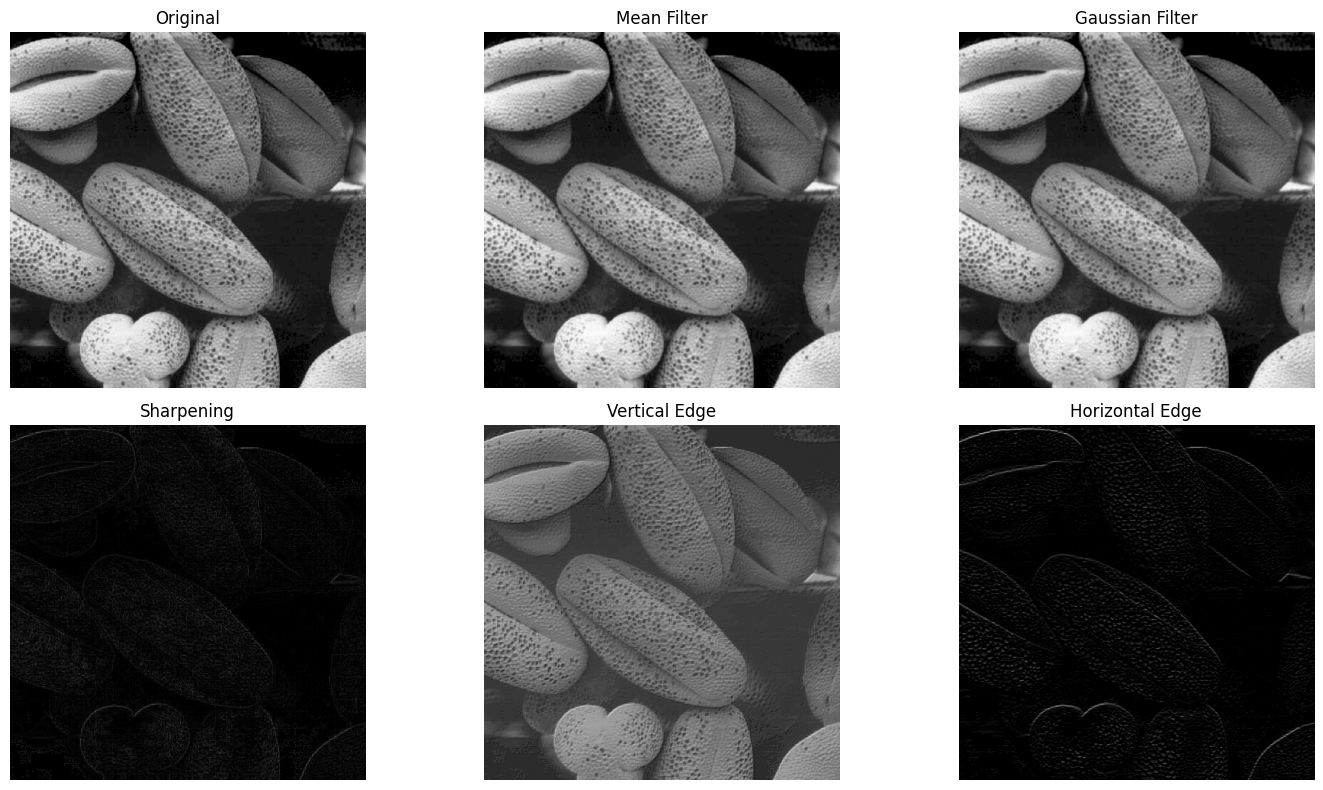

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 불러오기
img = cv2.imread("Fig0310(b)(washed_out_pollen_image).tif", cv2.IMREAD_GRAYSCALE)

# 마스크 정의 (위에서 가져온 것)
kernel1 = np.ones((3, 3), dtype=np.float32) / 9  # 평균 필터

kernel2 = np.array([
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0219, 0.0983, 0.1621, 0.0983, 0.0219],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030]
], dtype=np.float32)

kernel3 = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
], dtype=np.float32)

kernel4 = np.array([
    [-1,  0,  0],
    [ 0,  0,  0],
    [ 0,  1,  1]
], dtype=np.float32)

kernel5 = np.array([
    [ 0, -1, -1],
    [ 0,  0,  0],
    [ 0,  1,  1]
], dtype=np.float32)

kernels = [kernel1, kernel2, kernel3, kernel4, kernel5]
titles = ["Mean Filter", "Gaussian Filter", "Sharpening", "Vertical Edge", "Horizontal Edge"]

# 필터 적용
results = [cv2.filter2D(img, -1, k) for k in kernels]

# 결과 시각화
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

for i, result in enumerate(results):
    plt.subplot(2, 3, i + 2)
    plt.imshow(result, cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


다양한 필터로 노이즈 제거(Mean, Gaussian)와 선명도 및 경계 강조(Sharpen, Edge Detection)를 비교.
필터 종류에 따라 부드러움 또는 윤곽 강조 등 시각적 효과가 다르게 나타남.

### 2-4

이미지 다운로드 완료: school.jpg


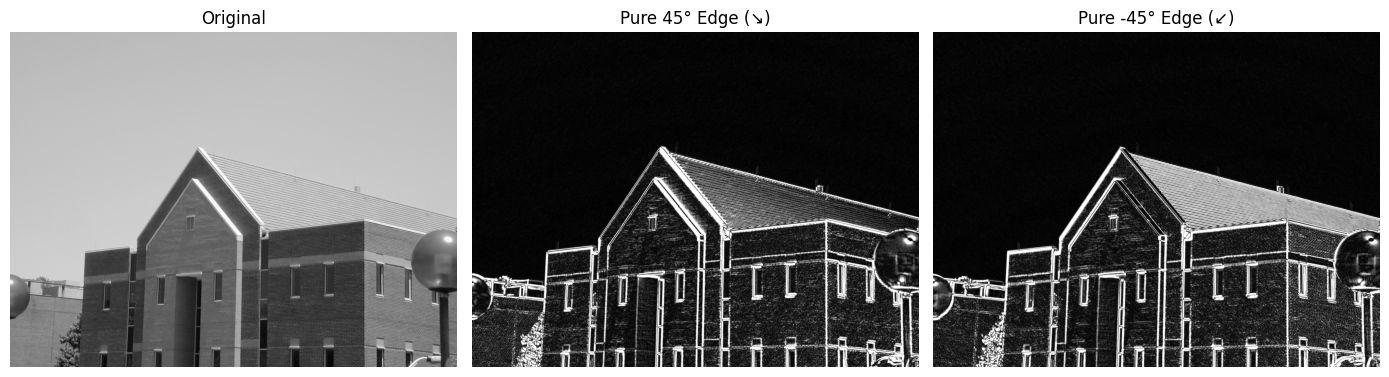

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ========================================
# 1. 이미지 다운로드
# ========================================
url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg"
filename = "school.jpg"

if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)
    print("이미지 다운로드 완료:", filename)
else:
    print("이미지가 이미 존재합니다:", filename)

# 이미지 로드
img = cv2.imread("school.jpg", cv2.IMREAD_GRAYSCALE)
kernel_strong_neg45_9x9 = np.array([
    [-2,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0, -2,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0, -2,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0, -2,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  2,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  2,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  2,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  2]
], dtype=np.float32)

kernel_strong_45_9x9 = np.array([
    [ 0,  0,  0,  0,  0,  0,  0,  0, -2],
    [ 0,  0,  0,  0,  0,  0,  0, -2,  0],
    [ 0,  0,  0,  0,  0,  0, -2,  0,  0],
    [ 0,  0,  0,  0,  0, -2,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  2,  0,  0,  0,  0,  0],
    [ 0,  0,  2,  0,  0,  0,  0,  0,  0],
    [ 0,  2,  0,  0,  0,  0,  0,  0,  0],
    [ 2,  0,  0,  0,  0,  0,  0,  0,  0]
], dtype=np.float32)


# 컨볼루션 적용
edge_45 = cv2.filter2D(img, cv2.CV_64F, kernel_strong_45_9x9)
edge_neg45 = cv2.filter2D(img, cv2.CV_64F, kernel_strong_neg45_9x9)

# 절댓값 처리
edge_45_abs = cv2.convertScaleAbs(edge_45)
edge_neg45_abs = cv2.convertScaleAbs(edge_neg45)

# 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edge_45_abs, cmap='gray')
plt.title("Pure 45° Edge (↘)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edge_neg45_abs, cmap='gray')
plt.title("Pure -45° Edge (↙)")
plt.axis('off')

plt.tight_layout()
plt.show()


커널 크기를 키워 더 명확히 보임.

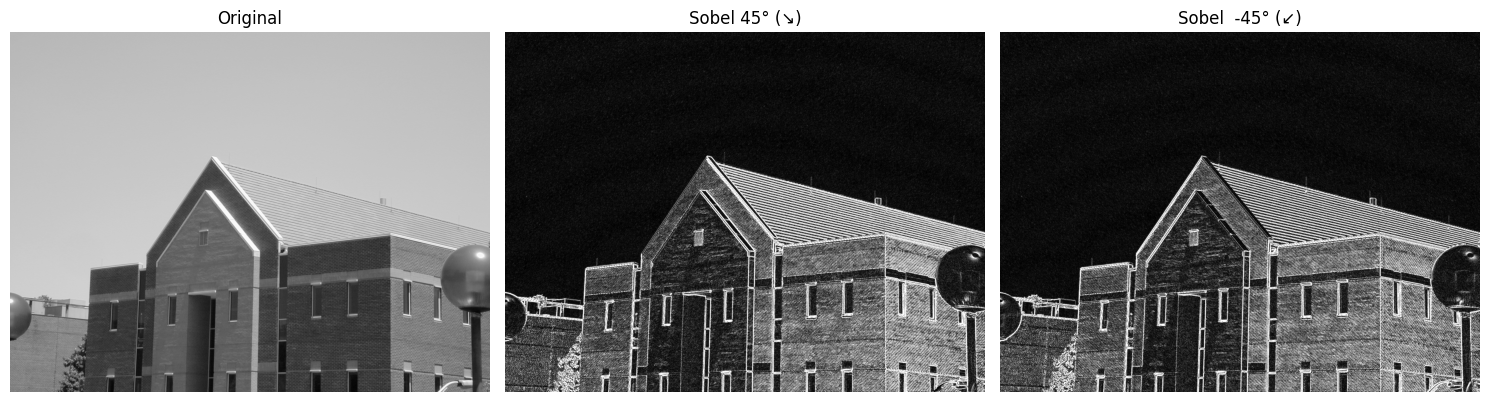

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ====================================
# 1. 이미지 불러오기
# ====================================
img = cv2.imread("school.jpg", cv2.IMREAD_GRAYSCALE)

# ====================================
# 2. 기본 Sobel 마스크 (Gx, Gy)
# ====================================
Gx = np.array([
    [-6,  0,  6],
    [-1,  0,  1],
    [-6,  0,  6]
], dtype=np.float32)

Gy = np.array([
    [-6, -1, -6],
    [ 0,  0,  0],
    [ 6,  1,  6]
], dtype=np.float32)


# ====================================
# 3. 변형된 Sobel 마스크 정의 (대각선)
# ====================================

# 45° 방향 대각선: Gy - Gx
G_45 = (Gy - Gx) / np.sqrt(2)

# -45° 방향 대각선: Gy + Gx
G_neg45 = (Gy + Gx) / np.sqrt(2)

# ====================================
# 4. 컨볼루션 적용
# ====================================
edge_45 = cv2.filter2D(img, cv2.CV_64F, G_45)
edge_neg45 = cv2.filter2D(img, cv2.CV_64F, G_neg45)

# 절댓값 처리 (시각화용)
edge_45_abs = cv2.convertScaleAbs(edge_45)
edge_neg45_abs = cv2.convertScaleAbs(edge_neg45)

# ====================================
# 5. 시각화
# ====================================
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edge_45_abs, cmap='gray')
plt.title("Sobel 45° (↘)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edge_neg45_abs, cmap='gray')
plt.title("Sobel  -45° (↙)")
plt.axis('off')

plt.tight_layout()
plt.show()


sobel마스크 기반으로 좀 더 부드러운 경계선 검출

### 2-5

이미지 다운로드 완료


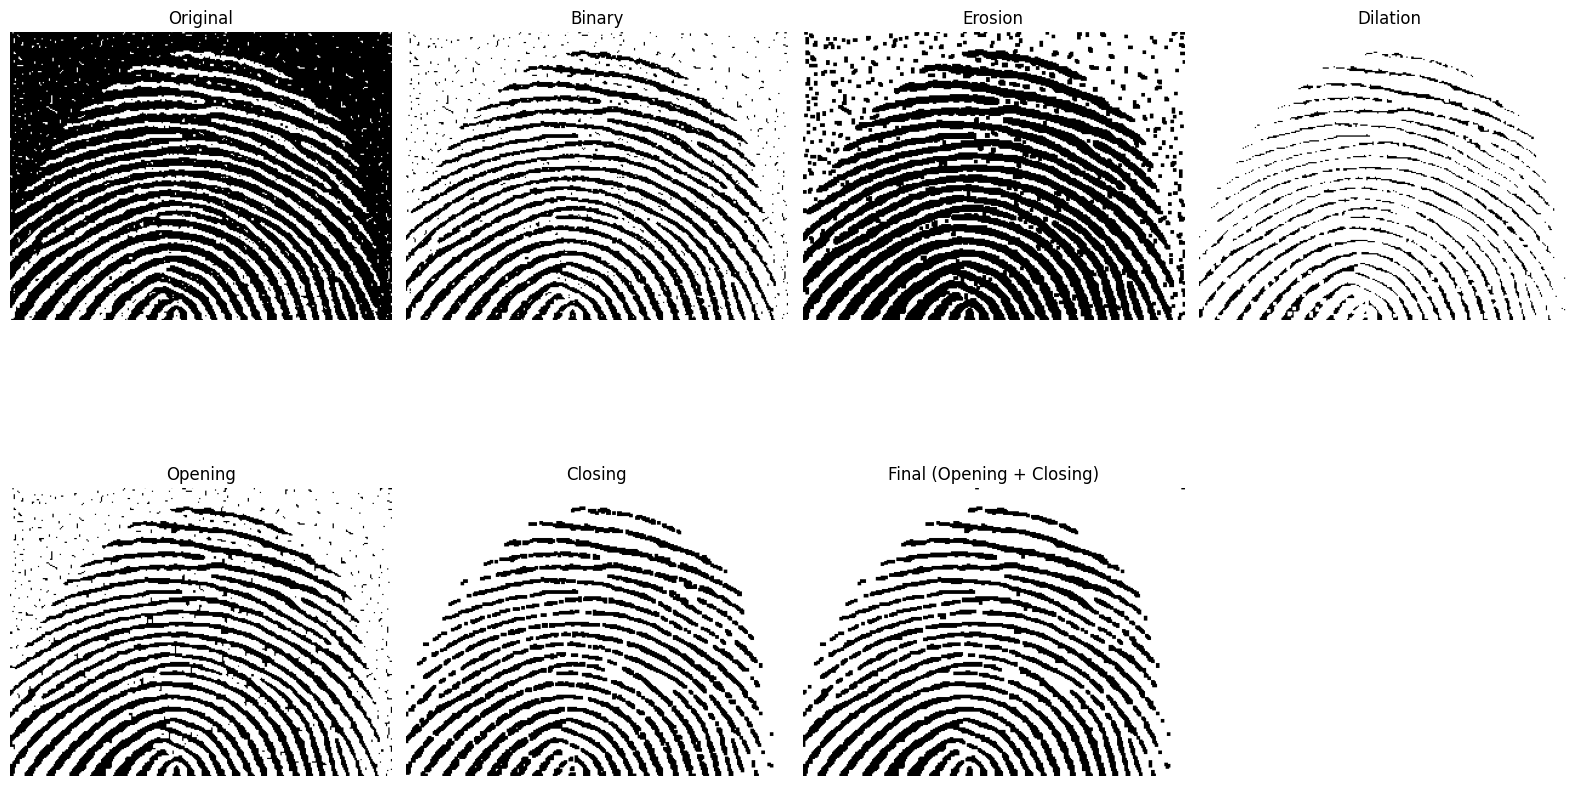

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request



url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg"
urllib.request.urlretrieve(url, "finger.jpg")
print("이미지 다운로드 완료")


# 이미지 불러오기 (흑백)
img = cv2.imread("finger.jpg", cv2.IMREAD_GRAYSCALE)

# 이진화 (선명하게 하기 위해 threshold 사용)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# 커널 정의 (모양과 크기 변경 가능)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# 형태학적 연산 적용
erosion = cv2.erode(binary, kernel, iterations=1)
dilation = cv2.dilate(binary, kernel, iterations=1)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# 개선된 최종 결과 = opening → closing
processed = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

# 시각화
titles = ["Original", "Binary", "Erosion", "Dilation", "Opening", "Closing", "Final (Opening + Closing)"]
images = [img, binary, erosion, dilation, opening, closing, processed]

plt.figure(figsize=(16, 10))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


침식·팽창·열기·닫기 등 형태학적 연산으로 지문 이미지를 노이즈 제거 및 윤곽 정제.
열기→닫기 연산 조합은 잡음 제거와 끊긴 선 복원을 동시에 수행해 최종 결과를 개선함.

### 2-6

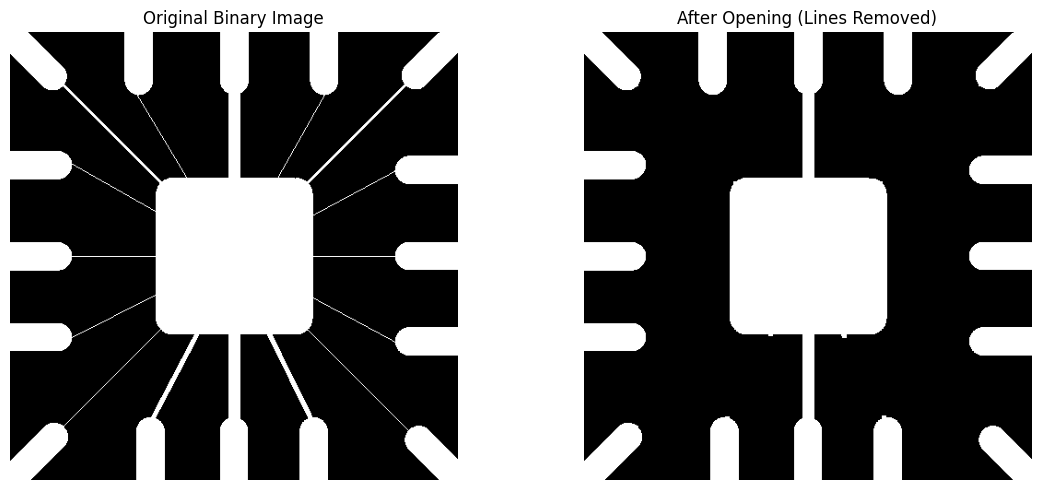

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# 이미지 다운로드
url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0905(a)(wirebond-mask).tif"
urllib.request.urlretrieve(url, "wirebond.tif")

# 1. 이미지 불러오기 (흑백)
img = cv2.imread("wirebond.tif", cv2.IMREAD_GRAYSCALE)

# 2. 이진화 (선명하게 만들기 위해)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# 3. 커널 정의 (선 크기에 맞게 설정 → 얇은 선보다 약간 크게)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# 4. Opening 연산: 침식 후 팽창 (얇은 선 제거됨)
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# 5. 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title("Original Binary Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(opened, cmap='gray')
plt.title("After Opening (Lines Removed)")
plt.axis('off')

plt.tight_layout()
plt.show()


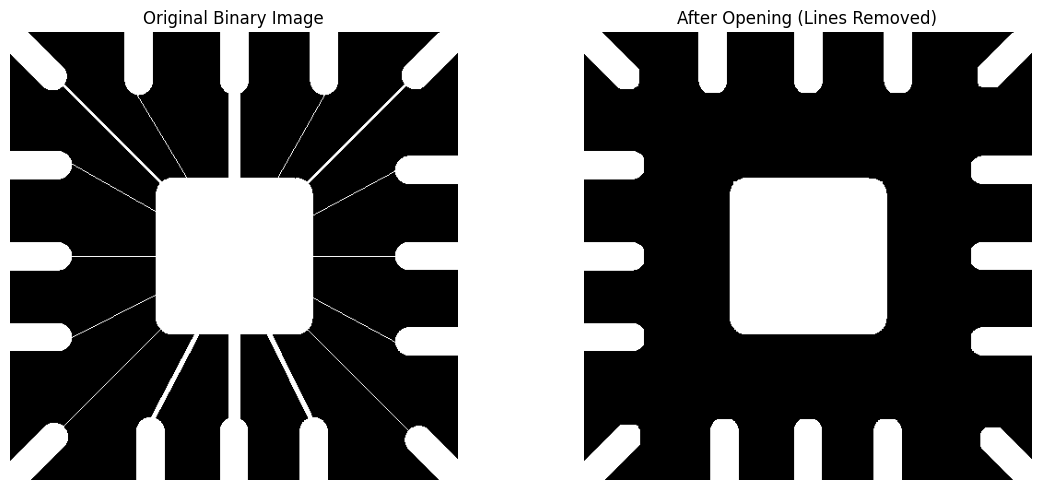

In [12]:
# 1. 이미지 불러오기 (흑백)
img = cv2.imread("wirebond.tif", cv2.IMREAD_GRAYSCALE)

# 2. 이진화 (선명하게 만들기 위해)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# 3. 커널 정의 (선 크기에 맞게 설정 → 얇은 선보다 약간 크게)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))

# 4. Opening 연산: 침식 후 팽창 (얇은 선 제거됨)
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# 5. 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title("Original Binary Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(opened, cmap='gray')
plt.title("After Opening (Lines Removed)")
plt.axis('off')

plt.tight_layout()
plt.show()

모든 선분이 제거되었지만 각 도형의 끝이 날카로워짐

### 2-7

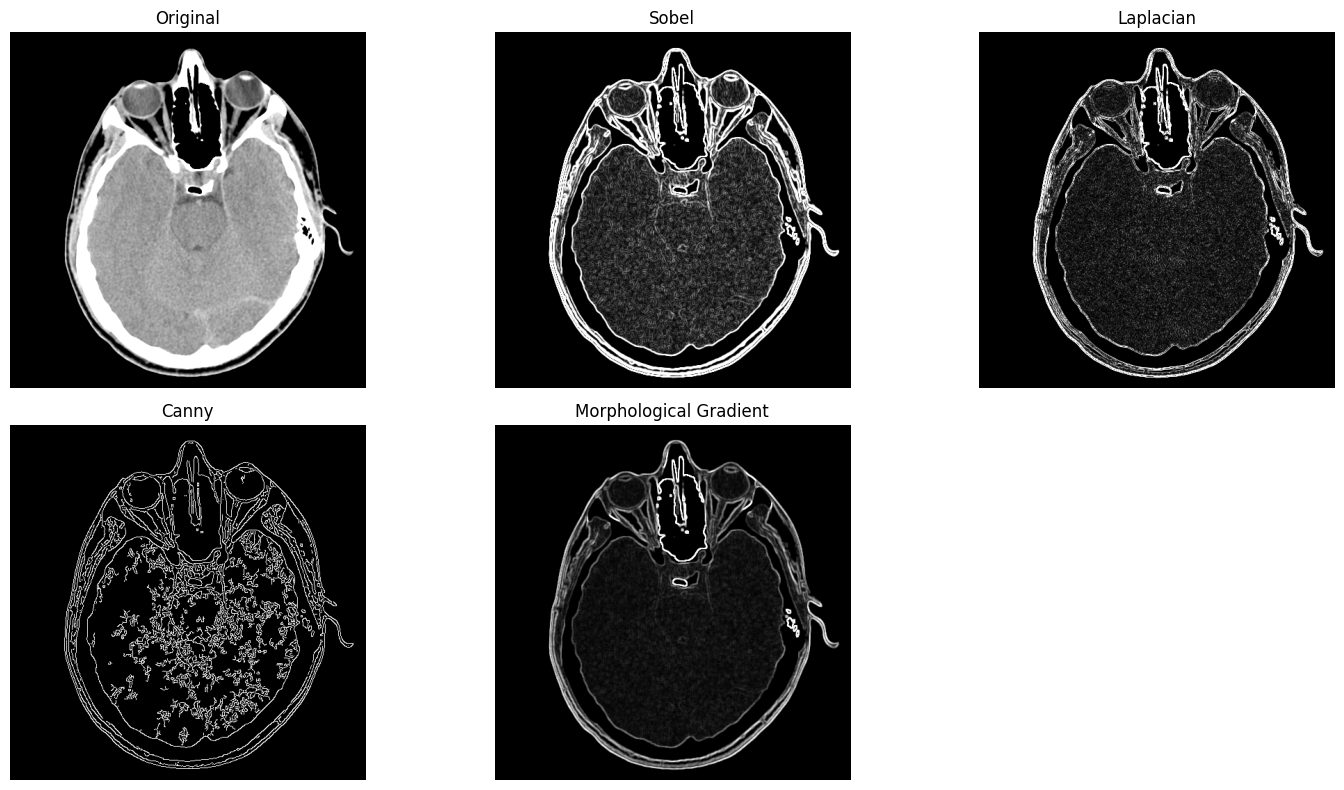

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# 1. 이미지 다운로드 및 불러오기 (흑백)
url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0939(a)(headCT-Vandy).tif"
urllib.request.urlretrieve(url, "ct.tif")
img = cv2.imread("ct.tif", cv2.IMREAD_GRAYSCALE)

# 2. Sobel (gradient x + y)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.convertScaleAbs(cv2.magnitude(sobelx, sobely))

# 3. Laplacian (2차 미분)
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
laplacian = cv2.convertScaleAbs(laplacian)

# 4. Canny (threshold 조절 가능)
canny = cv2.Canny(img, 50, 150)

# 5. Morphological Gradient = dilation - erosion
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morph_gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

# 6. 시각화
titles = ["Original", "Sobel", "Laplacian", "Canny", "Morphological Gradient"]
images = [img, sobel, laplacian, canny, morph_gradient]

plt.figure(figsize=(15, 8))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


Sobel, Laplacian, Canny, 형태학적 기법으로 CT 영상의 경계(두개골, 뇌 조직)를 다양한 방식으로 검출.
각 기법은 감도와 표현 방식이 달라 활용 목적에 따라 적절히 선택 가능.

라플라시안과 소벨 연산자는 노이즈에 민감함.

morphological gradient는 경계가 두꺼움

### 2-8

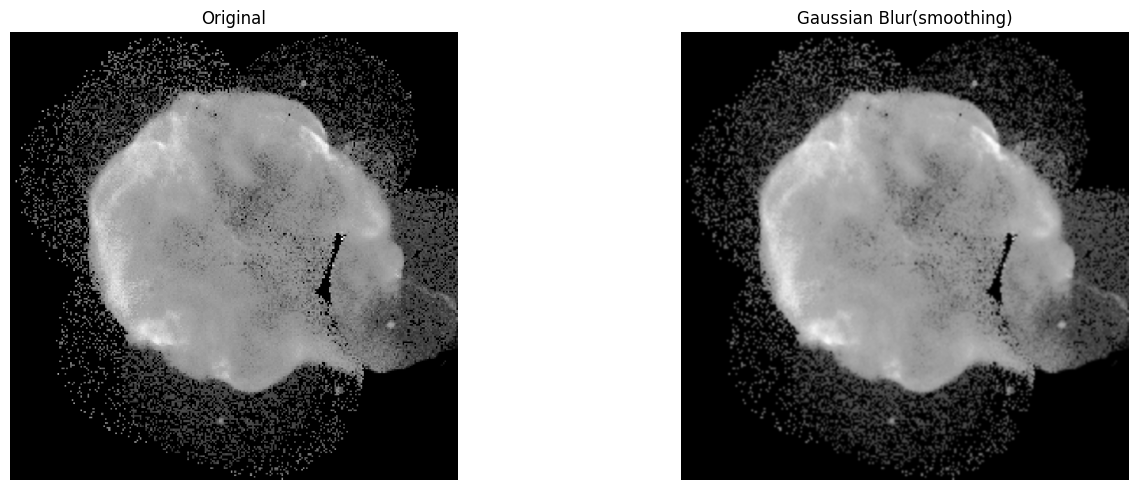

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# 1. 이미지 다운로드 및 불러오기
url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0938(a)(cygnusloop_Xray_original).tif"
urllib.request.urlretrieve(url, "xray.tif")
img = cv2.imread("xray.tif", cv2.IMREAD_GRAYSCALE)


# 3. Smoothing Filter: Gaussian Blur
blurred = cv2.GaussianBlur(img, (5, 5), sigmaX=1.0)

# 4. 시각화
titles = ["Original", "Gaussian Blur(smoothing)"]
images = [img, blurred]

plt.figure(figsize=(15, 5))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


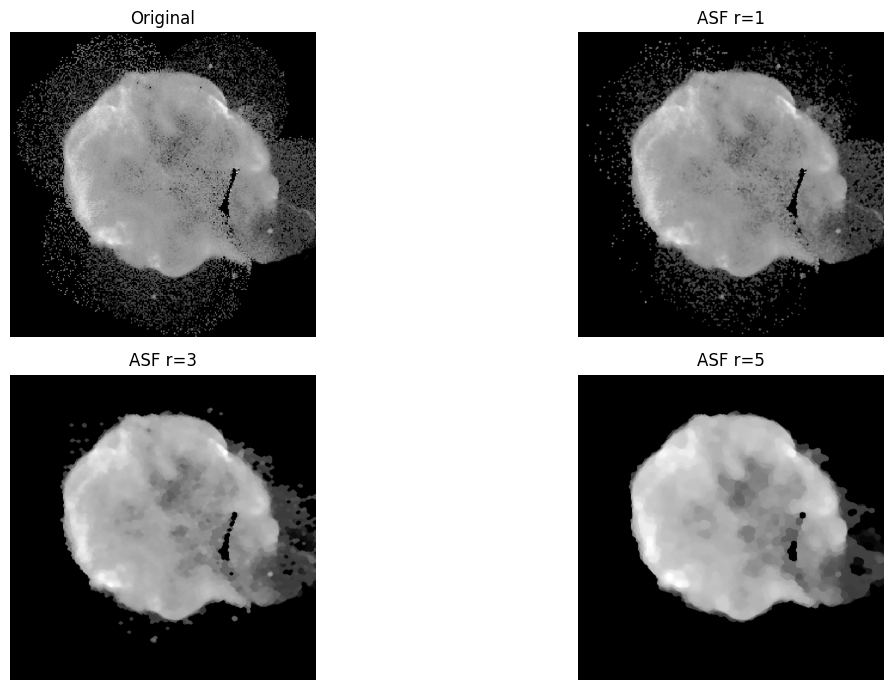

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request


img = cv2.imread("xray.tif", cv2.IMREAD_GRAYSCALE)

# 2. 디스크 구조 요소 생성 함수
def get_disk(radius):
    return cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (radius*2+1, radius*2+1))

# 3. ASF (열림 후 닫힘) 적용 함수
def asf(img, radius):
    kernel = get_disk(radius)
    opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
    return closed

# 4. radius 1, 3, 5 적용 결과
asf_r1 = asf(img, 1)
asf_r3 = asf(img, 3)
asf_r5 = asf(img, 5)

# 5. 시각화
titles = ['Original', 'ASF r=1', 'ASF r=3', 'ASF r=5']
images = [img, asf_r1, asf_r3, asf_r5]

plt.figure(figsize=(14, 7))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


가우시안 블러는 효과가 좋지 못했고, ASF 함수는 잘 적용 되었다.

### 2-9

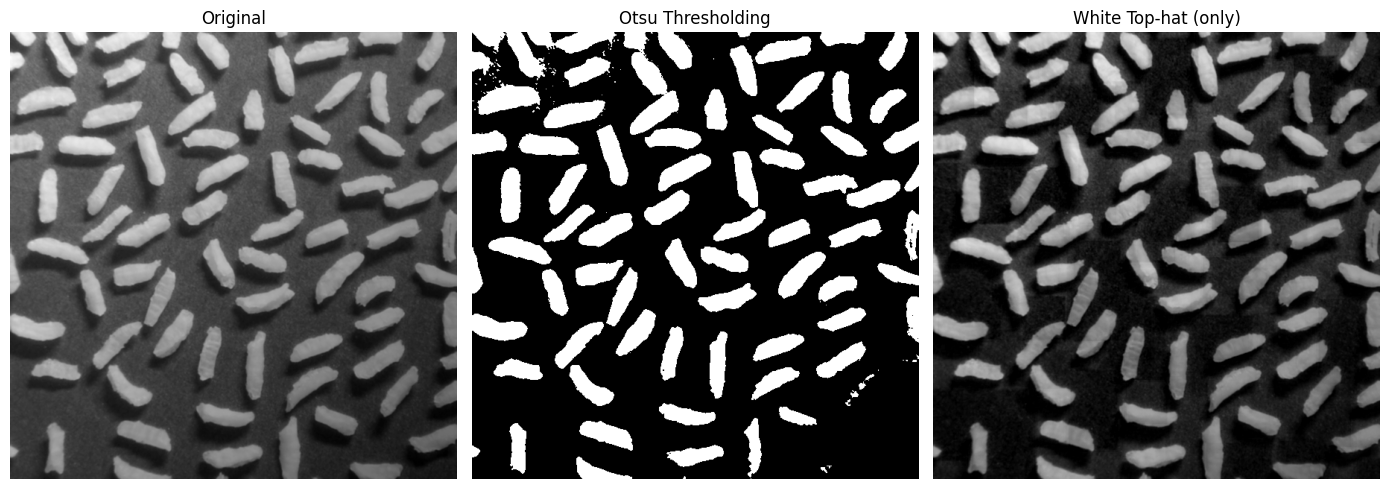

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# 1. 이미지 다운로드 및 로드
url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0940(a)(rice_image_with_intensity_gradient).tif"
urllib.request.urlretrieve(url, "rice.tif")
img = cv2.imread("rice.tif", cv2.IMREAD_GRAYSCALE)

# 2. Otsu Thresholding (원본에 적용)
_, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 3. White Top-hat Transform (밝은 부분 강조)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 50))
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# 4. 시각화
titles = ["Original", "Otsu Thresholding", "White Top-hat (only)"]
images = [img, otsu, tophat]

plt.figure(figsize=(14, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


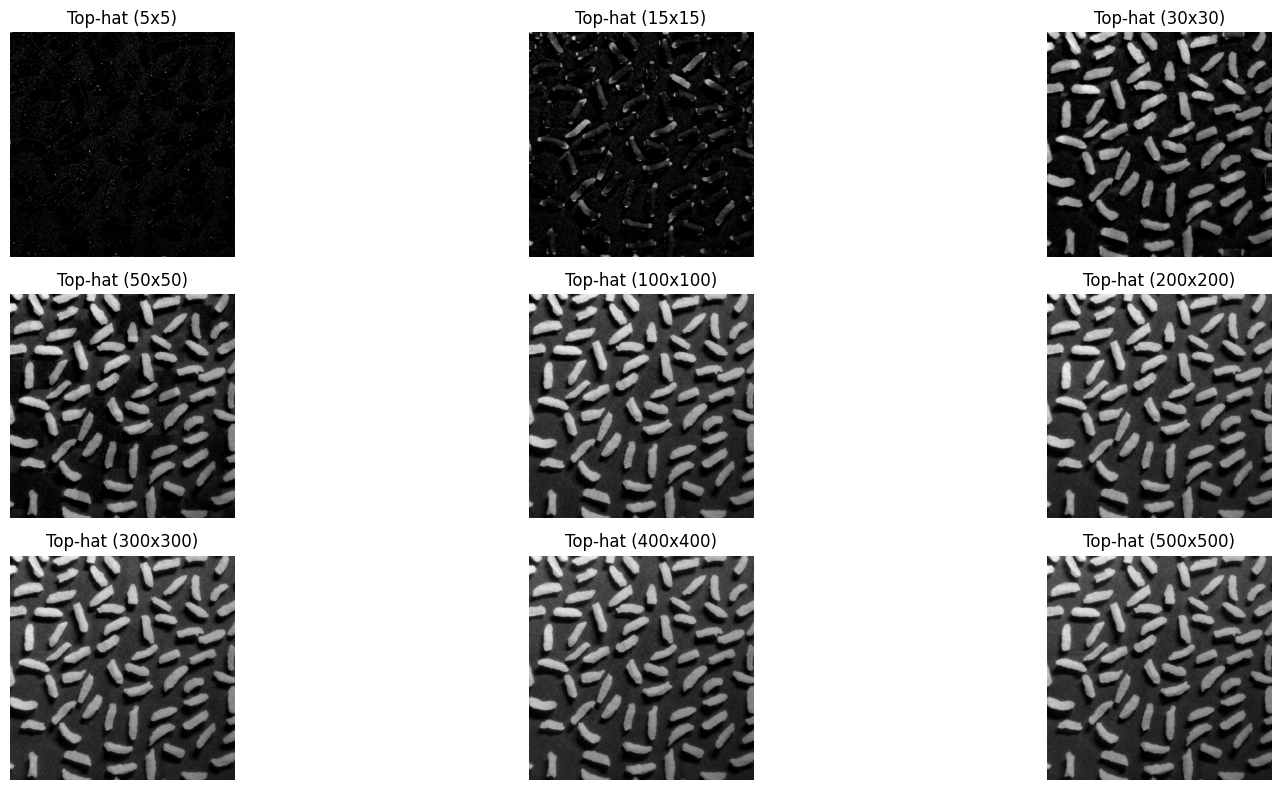

In [17]:

img = cv2.imread("rice.tif", cv2.IMREAD_GRAYSCALE)

# 2. 커널 크기 리스트
kernel_sizes = [5, 15, 30, 50, 100,200,300,400,500]
tophat_results = []

# 3. 각 커널 크기에 대해 Top-hat 연산 수행
for k in kernel_sizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (k, k))
    tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
    tophat_results.append((f"{k}x{k}", tophat))

# 4. 시각화
plt.figure(figsize=(18, 8))
plt.subplot(3, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

for i, (label, result) in enumerate(tophat_results):
    plt.subplot(3, 3, i + 1)
    plt.imshow(result, cmap='gray')
    plt.title(f"Top-hat ({label})")
    plt.axis('off')

plt.tight_layout()
plt.show()


otsu 연산자는 조명이 약한 부분을 인식하지 못하였고, top-hat 기법은 잘 인식해내었다.
하지만 커널 크기를 늘린다고 성능이 좋아진다고는 할 수 없다.

### 2-10

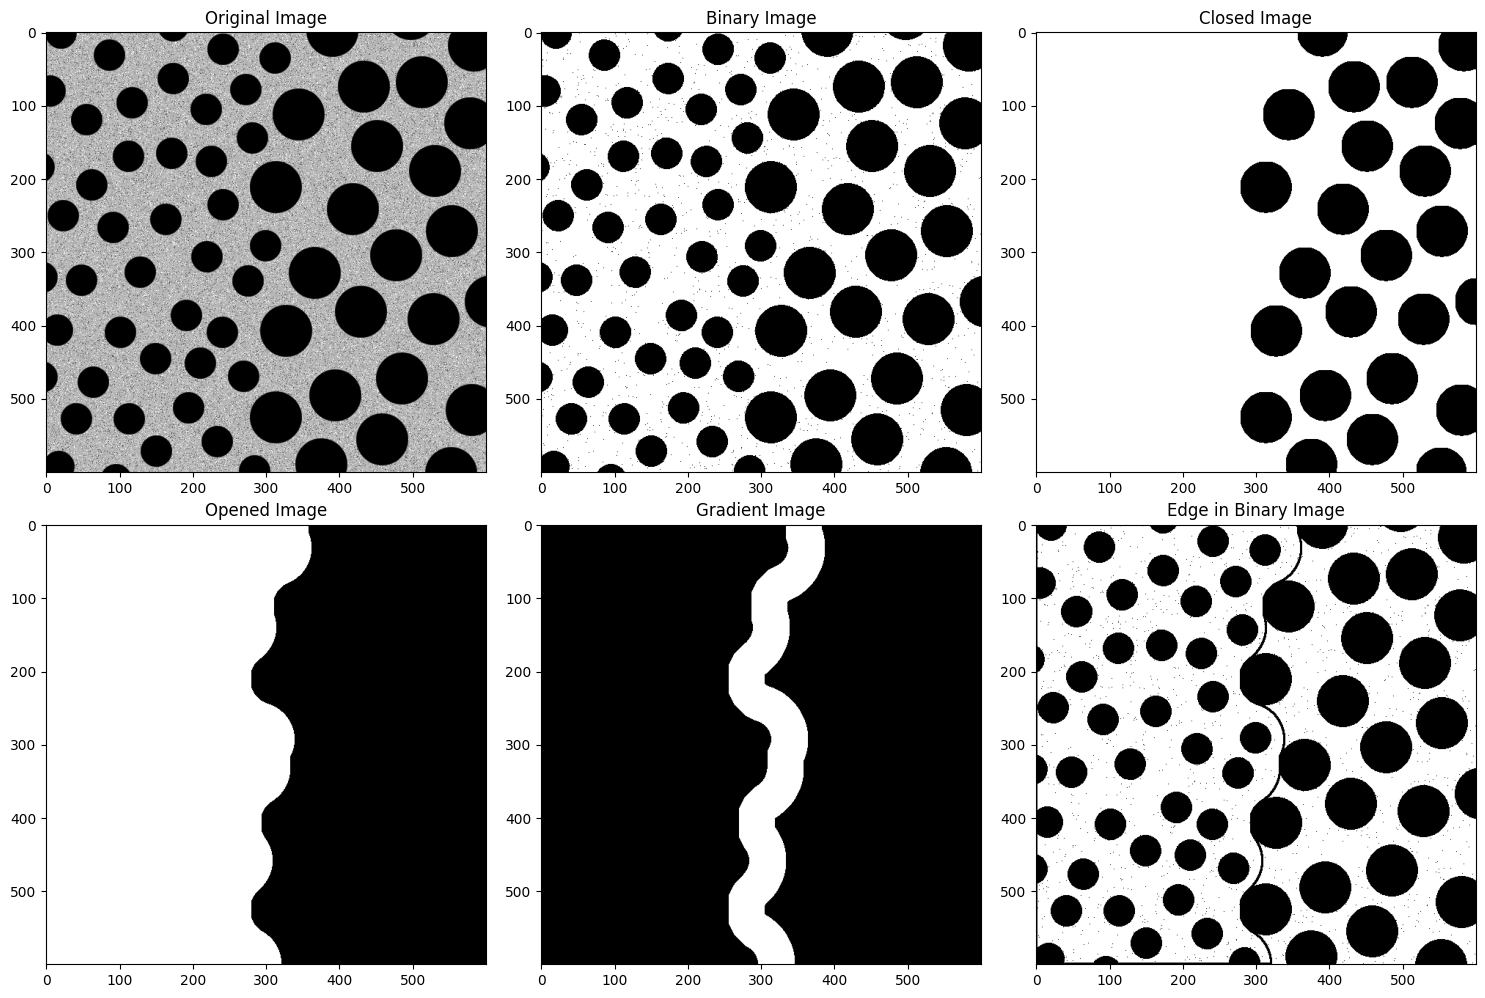

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 이미지 다운로드
url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0943(a)(dark_blobs_on_light_background).tif"
urllib.request.urlretrieve(url, "blobs.tif")
img = cv2.imread("blobs.tif", cv2.IMREAD_GRAYSCALE)

# 2. 이진화 (관심 객체가 흰색이므로 반전 없이 진행)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# 3. 작은 얼룩 제거 (닫힘 연산, 구조 요소 크기: 50)
kernel_close = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50))
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel_close)

# 4. 얼룩들 간 밝은 패치 제거 (열림 연산, 구조 요소 크기: 100)
kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (100, 100))
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel_open)

# 5. 형태학적 경계 추출 (기울기 연산, 구조 요소 크기: 50과 동일)
gradient = cv2.morphologyEx(opened, cv2.MORPH_GRADIENT, kernel_close)

# 6. opened 이미지의 경계 추출 및 바이너리 이미지에 적용 (검은색)
contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
edge_in_binary = binary.copy()
cv2.drawContours(edge_in_binary, contours, -1, (0, 0, 0), 2)  # 경계를 검은색으로 그림

# 시각화
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")

plt.subplot(2, 3, 2)
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")

plt.subplot(2, 3, 3)
plt.imshow(closed, cmap='gray')
plt.title("Closed Image")

plt.subplot(2, 3, 4)
plt.imshow(opened, cmap='gray')
plt.title("Opened Image")

plt.subplot(2, 3, 5)
plt.imshow(gradient, cmap='gray')
plt.title("Gradient Image")

plt.subplot(2, 3, 6)
plt.imshow(edge_in_binary, cmap='gray')
plt.title("Edge in Binary Image")

plt.tight_layout()
plt.show()

구조 요소 크기를 조정하며 큰 원들만을 인식하게 하는 것이 포인트다.
큰 커널을 활용한 열림·닫힘 연산으로 불필요한 얼룩 제거 후 관심 객체의 윤곽만 추출.
최종적으로 외곽선 검출과 마스크 적용으로 객체 경계를 선명하게 시각화함.